In [14]:
import numpy as np
import matplotlib.pyplot as plt
from a72_utilities import *
from scipy.signal import correlate2d, correlate
from skimage.io import imread, imsave
from skimage.registration import *
from scipy.ndimage import shift
from skimage.measure import block_reduce
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [15]:
cr_xas = imread('/Users/apple/Sync/Research/Alloy 72/20240614_Alloy_72_Native_Oxide/Raw XAS images/XAS_30_um_2CA_2AN_570-584eV_0.2eV_step_Cr2p.tif')
ni_xas = imread('/Users/apple/Sync/Research/Alloy 72/20240614_Alloy_72_Native_Oxide/Raw XAS images/XAS_30um_2CA_2AN_848-865eV_0.2eV_step_Ni2p.tif')
ti_xas = imread('/Users/apple/Sync/Research/Alloy 72/20240614_Alloy_72_Native_Oxide/Raw XAS images/XAS_30um_2CA_2AN_452-470eV_0.2eV_step_Ti2p.tif')
al_xas = imread('/Users/apple/Sync/Research/Alloy 72/20240614_Alloy_72_Native_Oxide/Raw XAS images/XAS_30um_2CA_2AN_75-90eV_0.2eV_step_Al2p.tif')
fe_xas = imread('/Users/apple/Sync/Research/Alloy 72/20240614_Alloy_72_Native_Oxide/Raw XAS images/XAS_30um_2CA_2AN_703-718eV_0.2eV_step_Fe2p.tif')
xas_elements = {"Cr":cr_xas,"Ni":ni_xas,"Ti":ti_xas,"Al":al_xas,"Fe":fe_xas}

al_mask = imread('/Users/apple/Sync/Research/Alloy 72/Segmentation/Fiji segmentation/Al_frame_30_leveled_gaussian_blur.tif')
cr_mask = imread('/Users/apple/Sync/Research/Alloy 72/Segmentation/Fiji segmentation/Cr_frame_30_leveled_gaussian_blur.tif')
fe_mask = imread('/Users/apple/Sync/Research/Alloy 72/Segmentation/Fiji segmentation/Fe frame 15 gaussian blur only.tif')
ni_mask = imread('/Users/apple/Sync/Research/Alloy 72/Segmentation/Fiji segmentation/Ni_frame_14_leveled_gaussian_blur.tif')
ti_mask = imread('/Users/apple/Sync/Research/Alloy 72/Segmentation/Fiji segmentation/Ti frame 37 gaussian blur.tif')
xas_masks = {"Cr":cr_mask,"Ni":ni_mask,"Ti":ti_mask,"Al":al_mask,"Fe":fe_mask}

xas_photon_energies= {"Cr":np.linspace(570,584,len(cr_xas)), "Ni":np.linspace(848,865,len(ni_xas)), 
                      "Ti":np.linspace(452,470,len(ti_xas)),"Al":np.linspace(75,90,len(al_xas)),
                      "Fe":np.linspace(703,718,len(fe_xas))}
print(len(cr_xas),len(ni_xas),len(ti_xas),len(al_xas),len(fe_xas))

72 87 91 77 77


[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


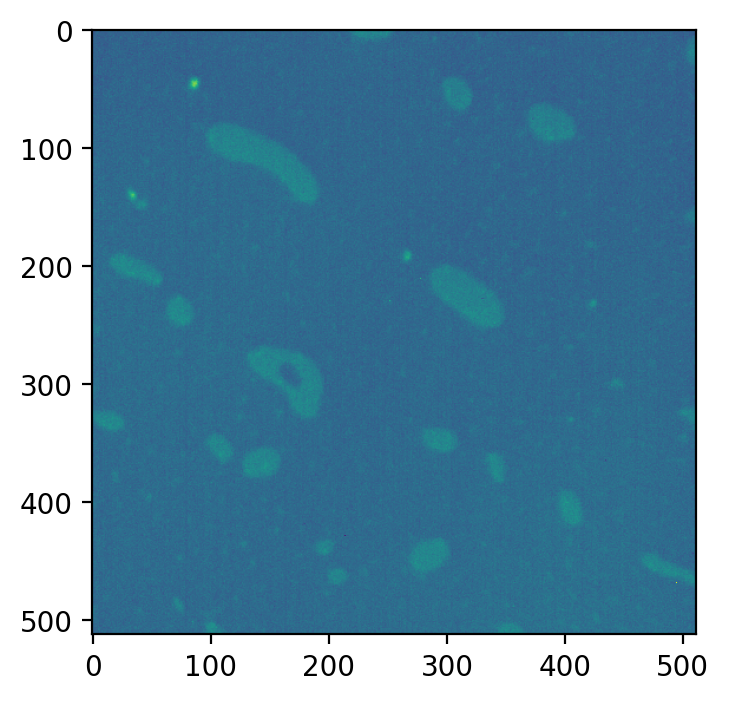

In [16]:
"""Try aligning the stack of images with phase cross correlation"""
image = block_reduce(cr_xas,block_size=(1,2,2))
ref_img = image[0,:,:]
shifted_hyperspectral = np.zeros(image.shape)
for i in range(len(image)):
    
    img_shift,err,phase = phase_cross_correlation(ref_img,image[i,:,:])
    print(img_shift)
    shifted_frame = shift(image[i,:,:],img_shift)

    shifted_hyperspectral[i,:,:] = shifted_frame
    ref_img = shifted_frame

plt.imshow(shifted_hyperspectral[10,:,:])
imsave('/Users/apple/Sync/Research/Alloy 72/Registration/Phase cross correlation/cr_test.tiff',shifted_hyperspectral.astype(np.uint16))


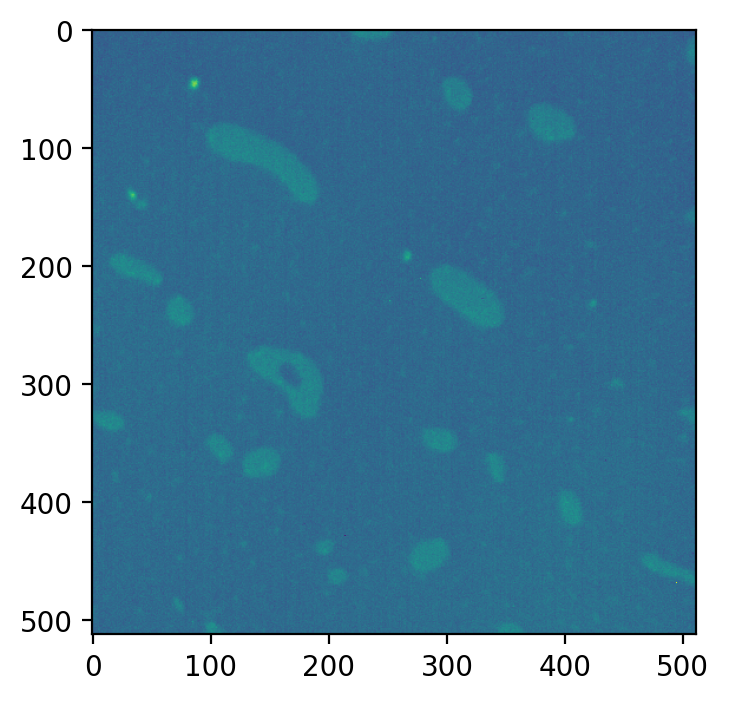

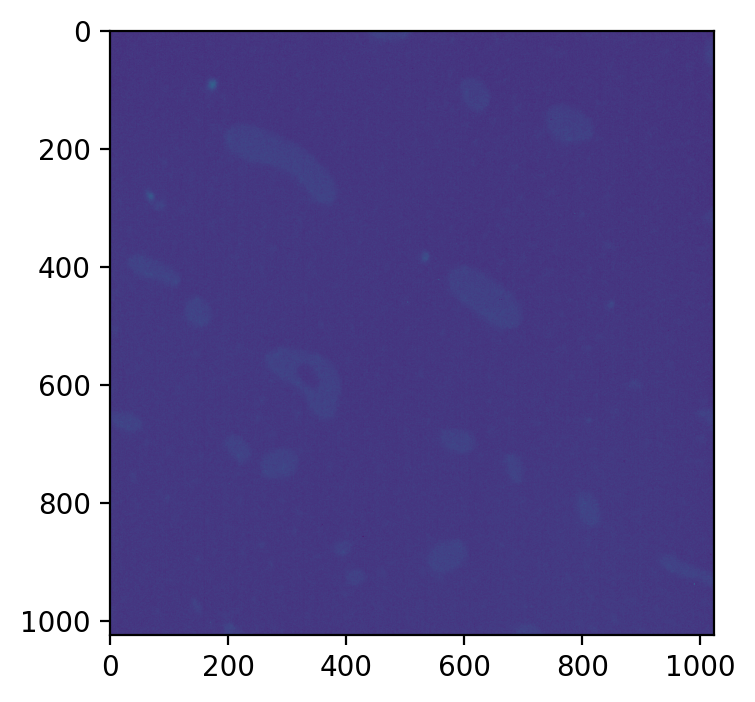

In [17]:
"""Try denoising by downsampling (local averaging)"""
test_img = cr_xas
downsampled = block_reduce(test_img,block_size=(1,2,2))
imsave('/Users/apple/Sync/Research/Alloy 72/Denoising/Downsampling/Cr_test.tiff', make_16bit(downsampled))

plt.imshow(downsampled[10])
plt.show()
plt.imshow(test_img[10])

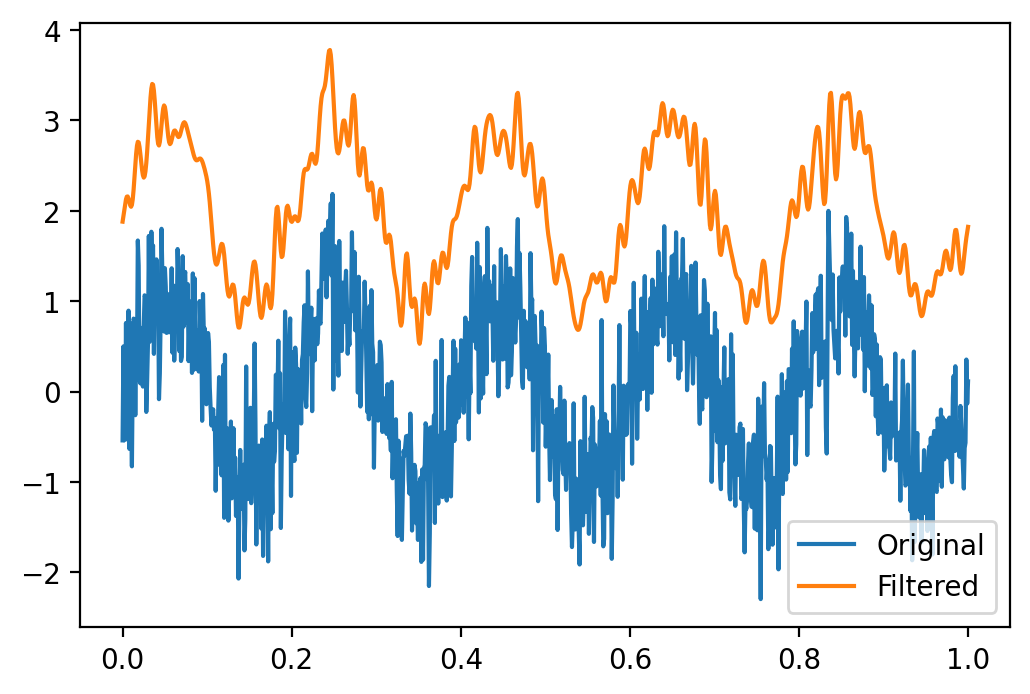

In [18]:
"""Try denoising by 3d fourier transform"""

def filter_signal(signal, threshold=1e8,d =1):
    """Applies a Fourier filter to denoise a signal."""

    fourier = np.fft.rfft(signal)
    frequencies = np.fft.rfftfreq(signal.size, d)
    fourier[frequencies > threshold] = 0
    return np.fft.irfft(fourier)

# Generate a noisy signal
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(1000)

# Apply the filter
filtered_signal = filter_signal(signal, threshold=.1)

# Plot the results
plt.plot(t, signal, label='Original')
plt.plot(t, filtered_signal+2, label='Filtered')
plt.legend()
plt.show()

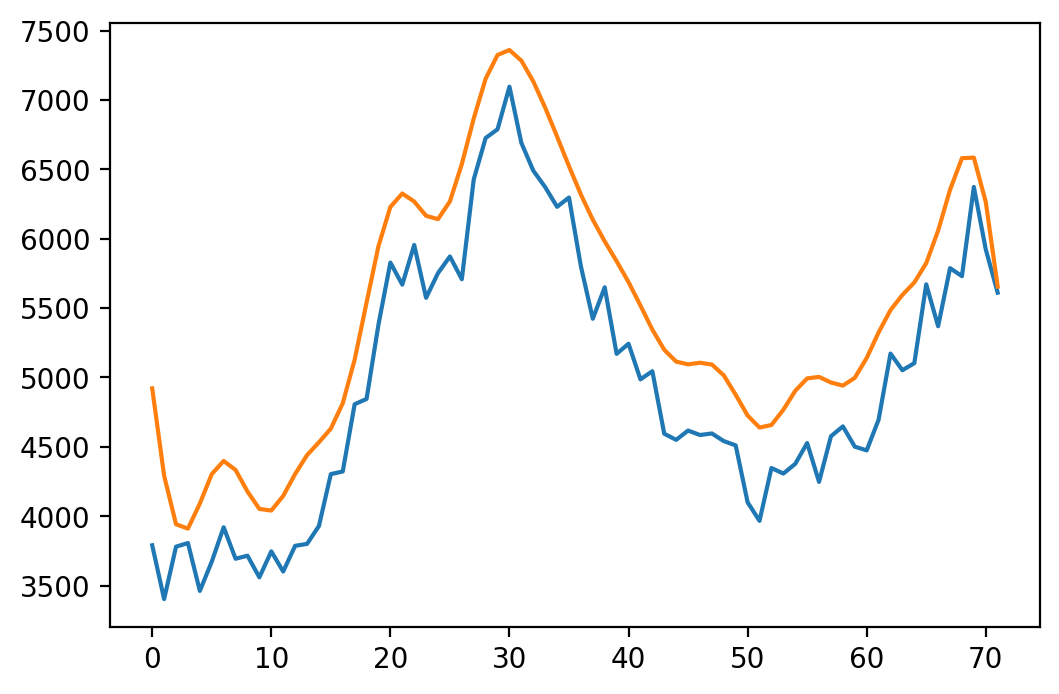

In [33]:
test = downsampled[:,200,200]
filtered_test = filter_signal(test,threshold=.15)

plt.plot(test)
plt.plot(filtered_test+500)